In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
#from tensorflow.keras.utils import to_categorical ## specific  one I wanna use
from tensorflow.keras import utils
#from tensorflow.keras.layers import Input, Dense, Dropout  # Specific ones I wanna use, can just import whole module
from tensorflow.keras import layers 
from tensorflow.keras.models import Model
import h5py
import tables
import matplotlib.pyplot as plt
#import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve



In [2]:
x=1
y=3
x+y

4

In [3]:
input_file2 = "/scratch/ys20884/ml_vars/TTToSemiLeptonic/df_ml_inputs.hd5"

with h5py.File(input_file2, "r") as f:
    print("Contents of the file:")
    for key in f.keys():
        print(key)

df2 = pd.read_hdf(input_file2, key="df")
print("Dataframe columns:")
print(df2.columns)


input_file4 = "/scratch/ys20884/ml_vars/ttH125/df_ml_inputs.hd5"

with h5py.File(input_file4, "r") as f:
    print("Contents of the file:")
    for key in f.keys():
        print(key)

df4 = pd.read_hdf(input_file4, key="df")
#print("Dataframe columns:")
#print(df4.columns)
print(len(df2))
print(len(df4))

Contents of the file:
df
Dataframe columns:
Index(['dataset', 'entry', 'BiasedDPhi', 'DiJet_mass', 'HT',
       'InputMet_InputJet_mindPhi', 'InputMet_phi', 'InputMet_pt', 'MHT_phi',
       'MHT_pt', 'MinChi', 'MinOmegaHat', 'MinOmegaTilde',
       'boostedObject_area', 'boostedObject_eta', 'boostedObject_mass',
       'boostedObject_phi', 'boostedObject_pt', 'boostedTop_area',
       'boostedTop_eta', 'boostedTop_mass', 'boostedTop_phi', 'boostedTop_pt',
       'boostedTop_tag', 'boostedV_area', 'boostedV_eta', 'boostedV_mass',
       'boostedV_phi', 'boostedV_pt', 'boostedV_tag', 'cleanedBJet_eta',
       'cleanedBJet_phi', 'cleanedBJet_pt', 'cleanedJet_area',
       'cleanedJet_btagDeepB', 'cleanedJet_chHEF', 'cleanedJet_eta',
       'cleanedJet_mass', 'cleanedJet_neHEF', 'cleanedJet_phi',
       'cleanedJet_pt', 'hashed_filename', 'ncleanedBJet', 'ncleanedJet',
       'weight_nominal', 'xs_weight'],
      dtype='object')
Contents of the file:
df
651387
177858


In [4]:
# make one big dataframe, 200000 long to practice with
df2 = df2[:100000]
df4 = df4[:100000]
df_total = df2.append(df4)
print(len(df_total))

# Background is 0
# Signal is 1
df_process = df_total['dataset']
df_total['dataset'] = df_total['dataset'].replace({'ttH125': 1, 'TTToSemiLeptonic': 0})
df_total.head()

#print(df_process)

200000


,dataset,entry,BiasedDPhi,DiJet_mass,HT,InputMet_InputJet_mindPhi,InputMet_phi,InputMet_pt,MHT_phi,MHT_pt,...,cleanedJet_eta,cleanedJet_mass,cleanedJet_neHEF,cleanedJet_phi,cleanedJet_pt,hashed_filename,ncleanedBJet,ncleanedJet,weight_nominal,xs_weight
0,0,31,0.084952,363.519776,409.411560,0.248169,-2.488281,253.625,-2.358126,230.740250,...,"[1.4013672, 2.1699219]","[26.78125, 11.1171875]","[0.05517578, 0.0]","[0.81640625, -2.2402344]","[319.85184, 89.55973]",-5233776389657243962,0,2,0.000001,0.000001
1,0,46,2.162490,129.015341,466.076111,1.818359,2.597656,308.250,2.504940,339.473511,...,"[-0.5136719, -0.95703125, 0.48168945, -0.11907...","[24.203125, 17.90625, 12.1015625, 7.8515625, 7...","[0.013671875, 0.09667969, 0.171875, 0.12890625...","[-0.5839844, -1.3388672, 0.30273438, 0.7788086...","[158.16063, 141.62325, 66.15963, 60.8369, 39.2...",-5233776389657243962,1,5,0.000001,0.000001
2,0,122,0.621207,274.769255,361.570465,0.668945,0.733887,278.250,0.807588,264.123840,...,"[0.5942383, -0.3046875]","[53.90625, 6.03125]","[0.0859375, 0.060546875]","[-2.4550781, 0.06530762]","[306.7605, 54.809956]",-5233776389657243962,1,2,0.000001,0.000001
3,0,161,2.733622,82.854809,359.750671,0.380127,-0.125732,218.750,-0.303148,227.014053,...,"[1.5175781, 1.0400391, -0.26538086]","[31.234375, 16.203125, 11.4296875]","[0.049316406, 0.1015625, 0.0]","[2.9140625, 2.5839844, -0.5058594]","[186.68669, 108.03608, 65.027885]",-5233776389657243962,0,3,0.000001,0.000001
4,0,173,2.422232,82.354687,314.990326,1.387695,2.214844,234.625,2.208970,254.779617,...,"[1.2236328, 0.49609375, 1.03125, -0.29858398]","[16.625, 8.75, 9.2578125, 4.9609375]","[0.064453125, 0.010131836, 0.15625, 0.029052734]","[-0.70703125, -0.4921875, -1.4736328, -2.6796875]","[117.50915, 96.34649, 68.59821, 32.53648]",-5233776389657243962,0,4,0.000001,0.000001


In [5]:
print(len(df_total))

200000


In [6]:
df_weights = df_total['xs_weight']
df_total.drop(['entry', 'BiasedDPhi', 'hashed_filename', 'weight_nominal', 'xs_weight', 
              'InputMet_phi', 'MHT_phi', 'boostedObject_phi', 'boostedTop_phi', 'boostedV_phi',
              'cleanedBJet_phi','cleanedJet_phi'], axis=1, inplace=True)
df_total.columns            # Said BiasedDPhi looks wrong



Index(['dataset', 'DiJet_mass', 'HT', 'InputMet_InputJet_mindPhi',
       'InputMet_pt', 'MHT_pt', 'MinChi', 'MinOmegaHat', 'MinOmegaTilde',
       'boostedObject_area', 'boostedObject_eta', 'boostedObject_mass',
       'boostedObject_pt', 'boostedTop_area', 'boostedTop_eta',
       'boostedTop_mass', 'boostedTop_pt', 'boostedTop_tag', 'boostedV_area',
       'boostedV_eta', 'boostedV_mass', 'boostedV_pt', 'boostedV_tag',
       'cleanedBJet_eta', 'cleanedBJet_pt', 'cleanedJet_area',
       'cleanedJet_btagDeepB', 'cleanedJet_chHEF', 'cleanedJet_eta',
       'cleanedJet_mass', 'cleanedJet_neHEF', 'cleanedJet_pt', 'ncleanedBJet',
       'ncleanedJet'],
      dtype='object')

In [7]:
# Need to manipulate all features so that they are useable
# Cell to put data names into to see what max array and min array size are
# Should both be 1 if is to work
y = []
x = df_total['boostedObject_area']
for i in x:
    y.append(len(i))
print(min(y))
print(max(y))

0
2


In [8]:
print(df_total.columns  )


Index(['dataset', 'DiJet_mass', 'HT', 'InputMet_InputJet_mindPhi',
       'InputMet_pt', 'MHT_pt', 'MinChi', 'MinOmegaHat', 'MinOmegaTilde',
       'boostedObject_area', 'boostedObject_eta', 'boostedObject_mass',
       'boostedObject_pt', 'boostedTop_area', 'boostedTop_eta',
       'boostedTop_mass', 'boostedTop_pt', 'boostedTop_tag', 'boostedV_area',
       'boostedV_eta', 'boostedV_mass', 'boostedV_pt', 'boostedV_tag',
       'cleanedBJet_eta', 'cleanedBJet_pt', 'cleanedJet_area',
       'cleanedJet_btagDeepB', 'cleanedJet_chHEF', 'cleanedJet_eta',
       'cleanedJet_mass', 'cleanedJet_neHEF', 'cleanedJet_pt', 'ncleanedBJet',
       'ncleanedJet'],
      dtype='object')


In [9]:
# A function that makes arrays in rows singular values, max if multiple in array, 0 if empty array
def modify_array(arr):    
    if len(arr) == 0:
        return 0
    else:
    # takes leading jet    
        return max(arr)    #Need values as floats, not as arrays as NN did not accept arrays, needed as float
                            # If wanted arrays, put [] around returns, simple as that.

# e.g. df["column_name"] = df["column_name"].apply(modify_array)#
#e.g   df_total.boostedTop_area = df_total.boostedTop_area.apply(modify_array)

In [10]:
# This should have manipulated all data so is now fit for a ML model
for column in df_total:
    if df_total[column].dtype == 'object':
        df_total[column] = df_total[column].apply(modify_array)


In [11]:
X = df_total.copy()    
X.drop(['dataset'], axis = 1, inplace = True)   #Need to remove dataset (prediction) column
y = df_total['dataset']

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

input_shape = [X_train.shape[1]]
print('There are', input_shape, 'variables in this model')
print('The dataset has', len(y), 'processes')
#print(len(x))
#print(len(y))
print(input_shape)

There are [33] variables in this model
The dataset has 200000 processes
[33]


In [12]:
#Define the Model

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape), 
    layers.Dense(units=256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate = 0.3), 
    layers.Dense(units=256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate = 0.3),
    layers.Dense(units=1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)



Epoch 1/200
313/313 [==============================] - 14s 39ms/step - loss: 0.6736 - binary_accuracy: 0.6488 - val_loss: 0.5770 - val_binary_accuracy: 0.6944
Epoch 2/200
313/313 [==============================] - 9s 29ms/step - loss: 0.5841 - binary_accuracy: 0.6891 - val_loss: 0.5644 - val_binary_accuracy: 0.7048
Epoch 3/200
313/313 [==============================] - 8s 27ms/step - loss: 0.5754 - binary_accuracy: 0.6949 - val_loss: 0.5639 - val_binary_accuracy: 0.7041
Epoch 4/200
313/313 [==============================] - 12s 37ms/step - loss: 0.5735 - binary_accuracy: 0.6960 - val_loss: 0.5637 - val_binary_accuracy: 0.7035
Epoch 5/200
313/313 [==============================] - 11s 37ms/step - loss: 0.5700 - binary_accuracy: 0.6987 - val_loss: 0.5591 - val_binary_accuracy: 0.7078
Epoch 6/200
313/313 [==============================] - 15s 46ms/step - loss: 0.5699 - binary_accuracy: 0.6993 - val_loss: 0.5594 - val_binary_accuracy: 0.7072
Epoch 7/200
313/313 [===========================

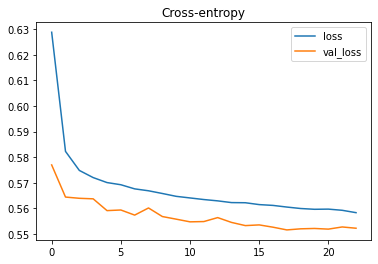

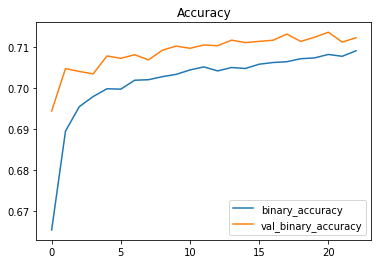

In [13]:
# Train the model

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
    #verbose = 0   #Hide output of epochs
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
history_df = pd.DataFrame(history.history)

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))



In [14]:
# evaluate the model on the validation data
val_loss, val_acc = model.evaluate(X_valid, y_valid)    # do this for x_test and y_test and can compare
#print(len(X_valid))  #these are actually correct, 10k, test train split makes 4k test
#print(len(y_valid))
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

y_pred = model.predict(X_valid)
y_pred_round = np.round(y_pred)
#print(y_pred)

# # compute the confusion matrix
# cm = confusion_matrix(y_valid, y_pred_round)
# #print(cm)

# #cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm/(len(y_pred))*100) # now out of 100%
# disp.plot()
# # make so 200%, amount background correct 100% and amount signal correct 100%
# plt.show()

1250/1250 [==============================] - 5s 4ms/step - loss: 0.5516 - binary_accuracy: 0.7132
Validation loss: 0.5515798330307007
Validation accuracy: 0.7131500244140625


[[0.74554311 0.25445689]
 [0.31896251 0.68103749]]


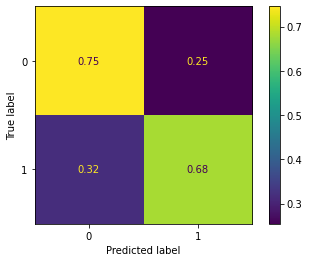

In [15]:
# compute the confusion matrix


cm = confusion_matrix(y_valid, y_pred_round, normalize = 'true')  #,'true' ‘pred’, ‘all’},)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm) # now out of 100%
disp.plot()
# make so 200%, amount background correct 100% and amount signal correct 100%
plt.show()

In [16]:
# Check if order of y_valid is the same order as y_pred
# expect to be the ssame order if accuracy is same as validation accuracy above.

# list of true outcomes
y_valid_list = list(y_valid)

# list of rounded predictions 
y_pred_round_list = list(y_pred_round)

# list of whether these are same    
z=[]
for i in range(len(y_valid_list)):
    if y_valid_list[i]==y_pred_round_list[i]:
        z.append(1)
    else:
        z.append(0)
        
print(sum(z)/len(z))

# Set a tolerance
tol = 0.0001
print(val_acc - tol < sum(z)/len(z) < val_acc + tol)

# If true, suggests are in same order 

0.71315
True


In [17]:
data = {'True_Val': y_valid_list, 'Predicted': list(y_pred), 'Round Prediction': y_pred_round_list}
df = pd.DataFrame(data)
df

,True_Val,Predicted,Round Prediction
0,0,[0.54482555],[1.0]
1,1,[0.23955965],[0.0]
2,0,[0.4081009],[0.0]
3,1,[0.23093936],[0.0]
4,0,[0.27558997],[0.0]
...,...,...,...
39995,1,[0.21414483],[0.0]
39996,1,[0.34080857],[0.0]
39997,0,[0.24948275],[0.0]
39998,1,[0.99130267],[1.0]


In [18]:
# Check that they maintained order in the df:

lst=[]
for i in range(len(df)):
    if df['True_Val'][i] == df['Round Prediction'][i]:
        lst.append(1)
    else:
        (lst.append(0))
print(sum(lst)/len(lst))

# Set a tolerance
tol = 0.0001
print(val_acc - tol < sum(lst)/len(lst) < val_acc + tol)

# If true, suggests are in same order 

0.71315
True


In [19]:
# Easiest to reorder df, so all 0 (background) are first and then 1's (signal)

#Verified, works
df = df.sort_values(by='True_Val')
df
#Can run cell above agai, after this one to check maintined order 

,True_Val,Predicted,Round Prediction
0,0,[0.54482555],[1.0]
22198,0,[0.17425296],[0.0]
22197,0,[0.5532861],[1.0]
22196,0,[0.1164414],[0.0]
22194,0,[0.5157712],[1.0]
...,...,...,...
6990,1,[0.8386377],[1.0]
25938,1,[0.91174364],[1.0]
11553,1,[0.6412432],[1.0]
25955,1,[0.5260885],[1.0]


In [20]:
# Convert arrays to scalars
df['Round Prediction'] = df['Round Prediction'].apply(lambda x: x[0])


In [21]:
pred_one = df['Round Prediction'].value_counts()[1.0]
ones_in_set = df['True_Val'].value_counts()[1]

# Print the result
print(pred_one)
print(ones_in_set)
print('The model predicted',pred_one-ones_in_set ,'more ones than in reality')
#so predicts like 3x less ones than are in set

pred_zeros = df['Round Prediction'].value_counts()[0.0]
zeros_in_set = df['True_Val'].value_counts()[0]

# Print the result
print(pred_zeros)
print(zeros_in_set)
print('The model predicted', pred_zeros-zeros_in_set,'more ones than in reality')


18747
20087
The model predicted -1340 more ones than in reality
21253
19913
The model predicted 1340 more ones than in reality


now first half of df is background, other half is signal

PROBLEM, TEST AND VALID WAS SPLIT RANDOMLY, SO NOT ACTUALLY SAME AMOUNT OF 0's AND 1's

Not a problem, but need to check if should be like this

 A couple of options, I could:

Deal with it, and let there be uneven amounts of 1's and 0's

OR

Go back to test_train_split, and apply individually to signal and background and then sum them?

This would guarantee 50/50


In [22]:
#Split df into signal and bg

df_bg = df[df['True_Val'] == 0]
df_signal = df[df['True_Val'] == 1]

#check no missing columns, if so out: True
len(df_bg)+len(df_signal) == len(df)

True

In [23]:
# Unneccessary, but check each type gives expected corrected and incorrect rate, to check that columns havent 
# Gotten messed up at all

lst_signal = []
for i in df_signal['Round Prediction']:
    if 1.0 == i:
        lst_signal.append(1)
    else:
        lst_signal.append(0)

#Below should == bottom rigtht of confusion matrix 
print(sum(lst_signal)/len(lst)*100) 

lst_bg = []
for i in df_bg['Round Prediction']:
    if 0.0 == i:
        lst_bg.append(1)
    else:
        lst_bg.append(0)

#Below should == top left of confusion matrix 
print(sum(lst_bg)/len(lst)*100) 

# SEE IS CORRECT SO ALL WORKING

34.2
37.114999999999995


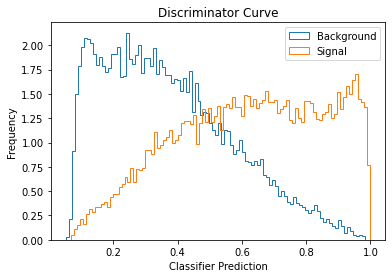

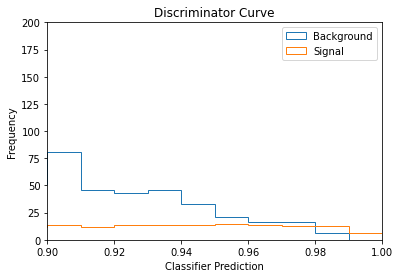

In [24]:
# Make discriminator curves, Histogram

# manipluate data so can be used for Histograms
lst_bg_predicted = []
for i in df_bg['Predicted']:
    lst_bg_predicted.append(i)

lst_of_values_bg_pred = [arr.item() for arr in lst_bg_predicted]

lst_signal_predicted = []
for i in df_signal['Predicted']:
    lst_signal_predicted.append(i)

lst_of_values_signal_pred = [arr.item() for arr in lst_signal_predicted]

#Unweighted
plt.hist(x= lst_of_values_bg_pred, bins=100, density = True, histtype = 'step', label = 'Background')
plt.hist(x= lst_of_values_signal_pred, bins=100, density = True, histtype = 'step', label = 'Signal')
plt.title('Discriminator Curve')
plt.xlabel('Classifier Prediction')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#Weighted to xs_weights x 300000, need to be to proportion of full dataset too
#normalised
binwidth = 1/100    # want bins of 0.01
plt.hist(x= lst_of_values_bg_pred, bins=np.arange(0, 1 + binwidth, binwidth),  weights = df2.xs_weight[:len(lst_of_values_bg_pred)]*3e5*(651387/100000),
         histtype = 'step', label = 'Background')
plt.hist(x= lst_of_values_signal_pred, bins=np.arange(0, 1 + binwidth, binwidth), weights = df4.xs_weight[:len(lst_of_values_signal_pred)]*3e5*(177858/100000),
         histtype = 'step', label = 'Signal')
plt.title('Discriminator Curve')
plt.xlabel('Classifier Prediction')
plt.ylabel('Frequency')
plt.xlim(0.9,1)    #zoom in on 0.9 to 1 region
plt.ylim(0,200)    # need to zoom in
plt.legend()
plt.show()


#start dropping bins for signifucance part, calc Z and plot, should get curve that peaks

#interesting see bins aren't algined
#


In [25]:
binwidth = 1/100
bins=np.arange(0, 1 + binwidth, binwidth)
bins

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

40040.347641944885
883.4215088561177


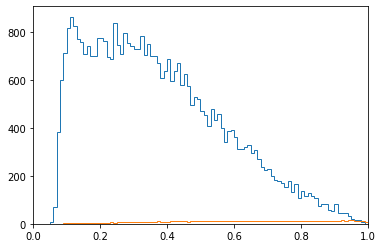

In [26]:
# tried to do the number of events without integrating, may have worked
binwidth = 1/100
n_bg, bins_bg, patches_bg = plt.hist(x= lst_of_values_bg_pred, bins=np.arange(0, 1 + binwidth, binwidth),  weights = df2.xs_weight[:len(lst_of_values_bg_pred)]*3e5*(651387/100000),
         histtype = 'step', label = 'Background')
n_signal, bins_signal, patches_signal = plt.hist(x= lst_of_values_signal_pred, bins=np.arange(0, 1 + binwidth, binwidth), weights = df4.xs_weight[:len(lst_of_values_signal_pred)]*3e5*(177858/100000),
         histtype = 'step', label = 'Signal')

plt.xlim(0,1)

# calculate the number of events
num_bg_events = np.sum(n_bg)
num_signal_events = np.sum(n_signal)

print(num_bg_events)
print(num_signal_events)



In [27]:

# calculate the width of each bin
bin_bg_width = bins_bg[1] - bins_bg[0]
bin_signal_width = bins_signal[1] - bins_signal[0]

# calculate the number of events using the trapezoidal rule
num_bg_events = np.sum(n_bg) 
num_signal_events = np.sum(n_signal) 

print(num_bg_events)             
print(num_signal_events)    #weird, for this one gives less, but bg gives same as below
                            #would expect to give the same

40040.347641944885
883.4215088561177


400.4086522006989
8.808741048847637


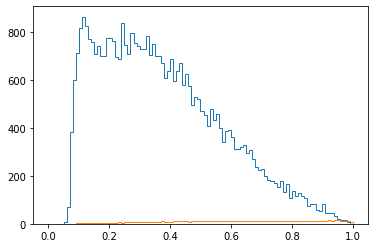

In [28]:
from scipy.integrate import simps
binwidth = 1/100
n_bg, bins_bg, patches_bg = plt.hist(x= lst_of_values_bg_pred, bins=np.arange(0, 1 + binwidth, binwidth),  weights = df2.xs_weight[:len(lst_of_values_bg_pred)]*3e5*(651387/100000),
         histtype = 'step', label = 'Background')
n_signal, bins_signal, patches_signal = plt.hist(x= lst_of_values_signal_pred, bins=np.arange(0, 1 + binwidth, binwidth), weights = df4.xs_weight[:len(lst_of_values_signal_pred)]*3e5*(177858/100000),
         histtype = 'step', label = 'Signal')

# calculate the width of each bin
bin_bg_width = bins_bg[1] - bins_bg[0]
bin_signal_width = bins_signal[1] - bins_bg[0]
# calculate the number of events using numerical integration
num_bg_events = simps(n_bg, dx=bin_bg_width)
num_signal_events = simps(n_signal, dx=bin_signal_width)
print(num_bg_events)             
print(num_signal_events)             #Seem a bit low lol

In [29]:

print( df4.xs_weight[1])
print( df2.xs_weight[1])

8.6958615e-08
1.0588149e-06


In [30]:
print(df_signal)

       True_Val     Predicted  Round Prediction
33015         1   [0.8878517]               1.0
3631          1   [0.5533837]               1.0
32749         1  [0.48843992]               0.0
3598          1   [0.4940186]               0.0
3750          1  [0.38004947]               0.0
...         ...           ...               ...
6990          1   [0.8386377]               1.0
25938         1  [0.91174364]               1.0
11553         1   [0.6412432]               1.0
25955         1   [0.5260885]               1.0
19999         1  [0.53087527]               1.0

[20087 rows x 3 columns]


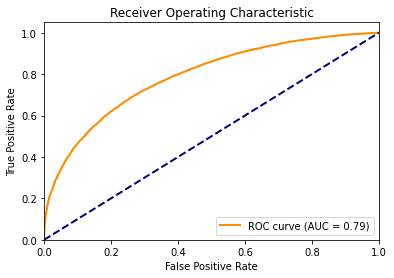

0.7887602853164988
14828


In [31]:
#plot ROC curves

y_true = df['True_Val']
y_score = df['Predicted']

# calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_true, y_score)

# calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(roc_auc)  #79%

print(len(thresholds))



In [32]:
data_roc = {'thresholds': thresholds, 'tpr': tpr, 'fpr': fpr, 'tpr/sqrt(fpr)':tpr/np.sqrt(fpr)}
df_roc = pd.DataFrame(data_roc)
df_roc

<ipython-input-32-66289c320eca>:1: RuntimeWarning: divide by zero encountered in divide
  data_roc = {'thresholds': thresholds, 'tpr': tpr, 'fpr': fpr, 'tpr/sqrt(fpr)':tpr/np.sqrt(fpr)}
<ipython-input-32-66289c320eca>:1: RuntimeWarning: invalid value encountered in divide
  data_roc = {'thresholds': thresholds, 'tpr': tpr, 'fpr': fpr, 'tpr/sqrt(fpr)':tpr/np.sqrt(fpr)}


,thresholds,tpr,fpr,tpr/sqrt(fpr)
0,1.999043,0.000000,0.000000,NaN
1,[0.99904287],0.000050,0.000000,inf
2,[0.98344207],0.015881,0.000000,inf
3,[0.98341775],0.015881,0.000050,2.241011
4,[0.98331225],0.016030,0.000050,2.262086
...,...,...,...,...
14823,[0.06908971],0.999900,0.998443,1.000680
14824,[0.06908652],0.999950,0.998443,1.000729
14825,[0.06678262],0.999950,0.998845,1.000528
14826,[0.066592515],1.000000,0.998845,1.000578


In [33]:
df_roc.head(20)

,thresholds,tpr,fpr,tpr/sqrt(fpr)
0,1.999043,0.000000,0.000000,NaN
1,[0.99904287],0.000050,0.000000,inf
2,[0.98344207],0.015881,0.000000,inf
3,[0.98341775],0.015881,0.000050,2.241011
4,[0.98331225],0.016030,0.000050,2.262086
5,[0.9832807],0.016030,0.000100,1.599536
6,[0.9829861],0.016528,0.000100,1.649211
7,[0.9829685],0.016528,0.000151,1.346576
8,[0.9779111],0.023348,0.000151,1.902241
9,[0.9777658],0.023348,0.000201,1.647389


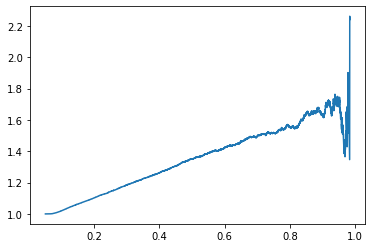

In [34]:
plt.plot(df_roc['thresholds'][3:], df_roc['tpr/sqrt(fpr)'][3:])
plt.show()

In [35]:
max(df_roc['tpr/sqrt(fpr)'][3:])

2.2620861410776616

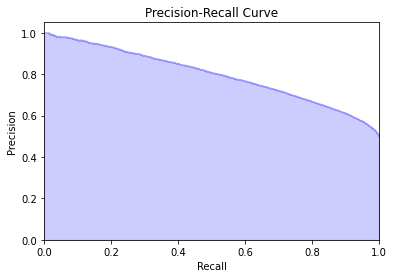

0.7974144824431451


In [36]:
# Plot precision recall curve
from sklearn.metrics import average_precision_score

y_true = df['True_Val']
y_score = df['Predicted']

# calculate the precision-recall curve
precision, recall, _ = precision_recall_curve(y_true, y_score)

# plot the precision-recall curve
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()

AUC = average_precision_score(y_true, y_score)   #0.793, pretty similar to roc AUC
print(AUC)

In [37]:
df['True_Val']
x = df['Predicted']
print(x)

0        [0.54482555]
22198    [0.17425296]
22197     [0.5532861]
22196     [0.1164414]
22194     [0.5157712]
             ...     
6990      [0.8386377]
25938    [0.91174364]
11553     [0.6412432]
25955     [0.5260885]
19999    [0.53087527]
Name: Predicted, Length: 40000, dtype: object


# Significance

$$ Z = \frac{s}{\sqrt(B+\sigma_s^{2})}  $$

s = number of signal

B = number of background

$\sigma_s$ = statistical uncertainty (~10% of B)

40040.347641944885
883.4215088561177


<ipython-input-39-93c52e230798>:22: RuntimeWarning: divide by zero encountered in double_scalars
  z_i = num_signal_events / np.sqrt(num_bg_events)
<ipython-input-39-93c52e230798>:22: RuntimeWarning: invalid value encountered in double_scalars
  z_i = num_signal_events / np.sqrt(num_bg_events)


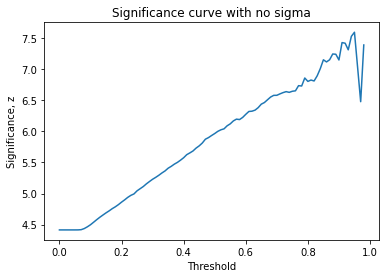

95
7.593911955091484


In [39]:
# Easier Idea

# binwidth = 1/100
# n_bg, bins_bg, patches_bg = plt.hist(x= lst_of_values_bg_pred, bins=np.arange(0, 1 + binwidth, binwidth),
#                                      weights = df2.xs_weight[:len(lst_of_values_bg_pred)]*3e5*(651387/100000),
#          histtype = 'step', label = 'Background')
# n_signal, bins_signal, patches_signal = plt.hist(x= lst_of_values_signal_pred, bins=np.arange(0, 1 + binwidth, binwidth),
#                                                  weights = df4.xs_weight[:len(lst_of_values_signal_pred)]*3e5*(177858/100000),
#          histtype = 'step', label = 'Signal')
# plt.show()
# calculate the number of events
num_bg_events = np.sum(n_bg)
num_signal_events = np.sum(n_signal)

print(num_bg_events)
print(num_signal_events)

z = np.empty(len(bins_bg))
for i in range(len(bins_bg)):
    num_bg_events = np.sum(n_bg[i:])
    num_signal_events = np.sum(n_signal[i:])
    z_i = num_signal_events / np.sqrt(num_bg_events)
    z[i] = z_i
#print(z)


x = np.linspace(0,1,len(z))
plt.plot(bins_bg,z[:])
#plt.xlim([0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('Threshold')
plt.ylabel('Significance, z')
plt.title('Significance curve with no sigma')
plt.show()


mask = z < 1e10     #just so doesnt include infs
index_of_max = np.argmax(z[mask])
max_value = np.amax(z[mask])


#index_of_max = np.nanargmax(z[:])
#max_value = np.nanmax(z[:])     # 1 point before last, should probs generalise so that can deal w inf etc 
print(index_of_max)
print(max_value)

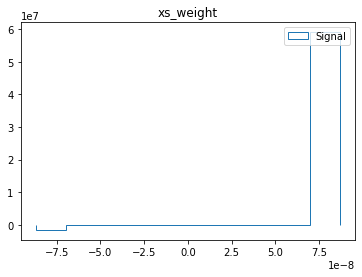

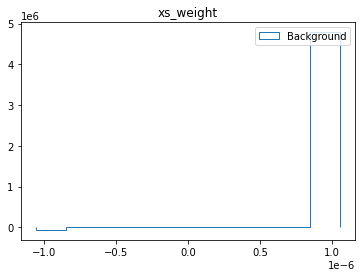

In [40]:
# See weight is const basically, so just use a value

semi_xs_weight = df2['xs_weight']   # plot to show is wrong, at least 1 -ive val (is this right?)
signal_xs_weight = df4['xs_weight'] 
#plt.hist(x=semi_xs_weight, bins = 10, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_xs_weight, bins = 10, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('xs_weight')
plt.legend()
plt.show() 

semi_xs_weight = df2['xs_weight']   # plot to show is wrong, at least 1 -ive val (is this right?)
signal_xs_weight = df4['xs_weight'] 
plt.hist(x=semi_xs_weight, bins = 10, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
#plt.hist(x=signal_xs_weight, bins = 10, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('xs_weight')
plt.legend()
plt.show() 

In [41]:
#Also, to make sure we get the event weights correct, can each of you try and produce a number for the 
#total number of events you obtain when using all events in the ttH125 and ttbar semileptonic dataframes,
#normalized to 300/fb?
#Hopefully you all arrive at the same result.

# Sligthly confused, does x_s weight normalised already entail no. events,
# So xs_weight * 300,000 is no events

#Or

# Are we meant to use the equation you showed us last week and work out what N should be

#Or

# do both and compare them as should be same?

bg_weight = semi_xs_weight[1]
signal_weight = signal_xs_weight[1]

# total number SL
sl_tot_events = bg_weight * 300000      # weight per pb to 300fb

# total number signal
signal_tot_events = signal_weight * 300000

print('Total number of semileptonic events is {}'.format(sl_tot_events))
print('Total number of ttH125 events is {}'.format(signal_tot_events))
print()

sl_events = 300000 * 500
signal_events = 300000 * 0.5

print('Total number of semileptonic events is {}'.format(sl_events)) #150000k
print('Total number of ttH125 events is {}'.format(signal_events))   #150k
#tot_events = 

Total number of semileptonic events is 0.3176444579366944
Total number of ttH125 events is 0.02608758435940217

Total number of semileptonic events is 150000000
Total number of ttH125 events is 150000.0
